___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [8]:
x_train[5].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

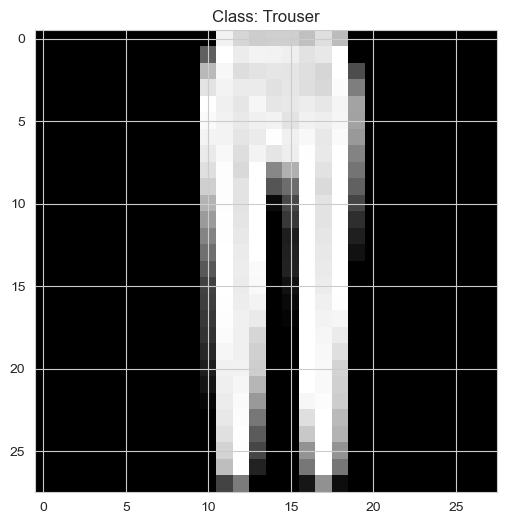

In [10]:
import matplotlib.pyplot as plt

# Choose an image
index = 97 

# Display the selected image along with its class name
plt.figure()
plt.imshow(x_train[index], cmap='gray')
plt.title(f'Class: {classes[y_train[index]]}')
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [11]:
max_pixel_value = np.max(x_train)

# Normalize the data by dividing by the maximum pixel value
x_train = x_train / max_pixel_value
x_test = x_test / max_pixel_value
max_pixel_value

255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
# Reshape the X arrays to include the single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)  
y_test = to_categorical(y_test, num_classes=10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Pooling Layer where pool_size = (2,2) strides=(1,1)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Final Dense Layer of 10 Neurons with a softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with the specified parameters
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [18]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1500/1500 [==============================] - 28s 18ms/step - loss: 0.4275 - accuracy: 0.8466 - val_loss: 0.3152 - val_accuracy: 0.8920
Epoch 2/50
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2834 - accuracy: 0.8991 - val_loss: 0.2810 - val_accuracy: 0.8962
Epoch 3/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2392 - accuracy: 0.9134 - val_loss: 0.2787 - val_accuracy: 0.9013
Epoch 4/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2090 - accuracy: 0.9241 - val_loss: 0.2551 - val_accuracy: 0.9083
Epoch 5/50
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1848 - accuracy: 0.9343 - val_loss: 0.2517 - val_accuracy: 0.9097
Epoch 6/50
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1656 - accuracy: 0.9407 - val_loss: 0.2520 - val_accuracy: 0.9158
Epoch 7/50
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1500 - accuracy: 0.9465 - val_loss: 0.2790 -

**TASK 7: Plot values of metrics you used in your model.**

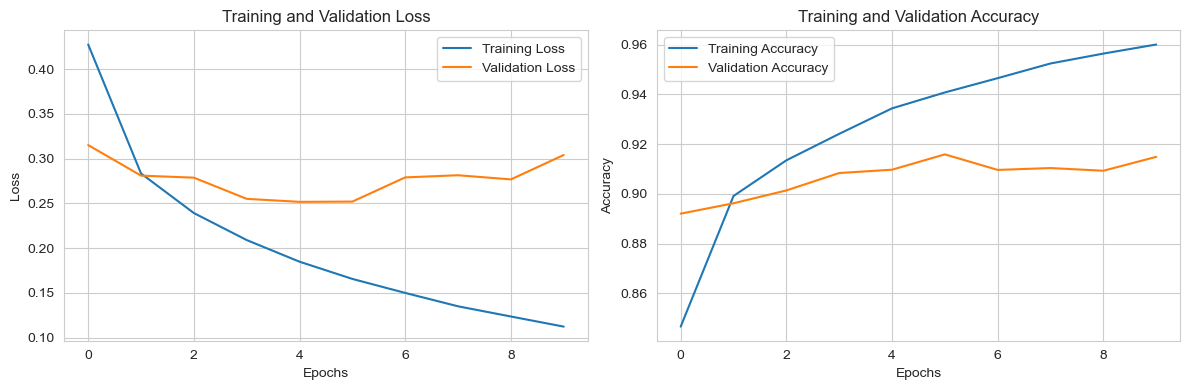

In [19]:
# Get training and validation loss and accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# plot for the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [20]:
from sklearn.metrics import classification_report

In [21]:
# Predict the classes on the x_test data
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [22]:
# Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

In [23]:
# Convert one-hot encoded ground truth labels to class labels
y_test_labels = np.argmax(y_test, axis=1)

In [24]:
# Calculate the classification report
report = classification_report(y_test_labels, y_pred_labels)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.85      0.85      1000
           3       0.89      0.95      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.82      0.66      0.73      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [25]:
unique, counts = np.unique(y_test_labels, return_counts=True)

# Create a dictionary to display the count of data samples for each class
class_count = dict(zip(unique, counts))

# Print the count of data samples for each class
for class_label, count in class_count.items():
    print(f"Class {class_label}: {count} samples")

Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


## Prediction

In [53]:
new_image = x_test[54]

In [54]:
new_image.shape

(28, 28, 1)

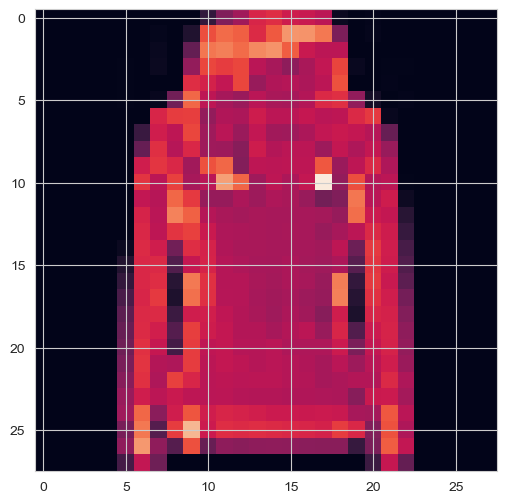

In [55]:
plt.imshow(new_image)
plt.show()

In [56]:
image_prediction = model.predict(new_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 39ms/step


In [57]:
predicted_label = np.argmax(image_prediction)

# Display the predicted class label
print(f"Predicted Label: {classes[int(predicted_label)]}")

Predicted Label: Pullover


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___